[![Banner-Modelos.png](https://i.postimg.cc/RCgy2XdL/Banner-Modelos.png)](https://postimg.cc/PN8SwbBC)

# L1:  Regresión polinomial: caso de una sola variable.

El objetivo de este notebook es mostrar cómo construir un modelo de regresión polinomial a partir del uso de transformaciones polinomiales sobre las variables predictoras. Para ello seguiremos los siguientes pasos

1. Preparar los datos para el modelado.
2. Construir el modelo de regresión polinomial.
3. Evaluar el modelo.

Vamos a utilizar el conjunto de datos relacionado con la estimación del precio de una vivienda con base en características de la zona de ubicación.

Recuerda que puedes utilizar este notebook como guía para la solución de los problemas que se propongan en los ejercicios prácticos y para el proyecto.

###### Autor: Julián Montoya (jc.montoyar@uniandes.edu.co)

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

Ejecuta la celda de abajo si no tienes sklearn instalado aún.

In [ ]:
!pip install -U scikit-learn

In [1]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para realizar la transformación de variables para realizar la regresión polinomial
from sklearn.preprocessing import PolynomialFeatures 
# Para visualizar los datos y el modelo entrenado utilizamos matplotlib
import matplotlib.pyplot as plt

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [2]:
# Se cargan los datos. 
data=pd.read_csv('Datos_hausing.csv',sep=';')

In [3]:
# Mostrar los datos
data.head()

,estrato,precio
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.21,28.7


In [4]:
# Cantidad de datos y número de variables
data.shape

(394, 2)

### 3. Descripción de datos

In [5]:
data.describe()

,estrato,precio
count,394.000000,394.000000
mean,12.769112,22.359645
std,7.308430,9.142979
min,1.730000,5.000000
25%,7.125000,16.800000
50%,11.300000,21.050000
75%,17.117500,25.000000
max,37.970000,50.000000


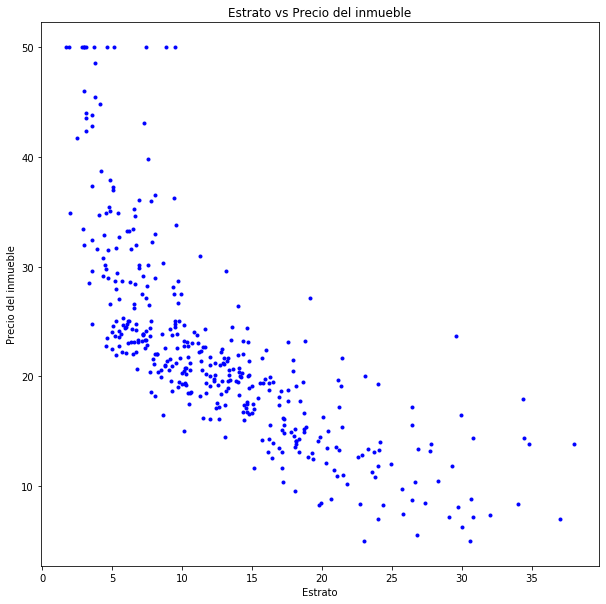

In [6]:
# Generamos un gráfico de dispersión, que nos permitirá ver la relación entre las dos variables.
plt.figure(figsize=(10,10))
plt.plot(data['estrato'],data['precio'],'.', color='blue')
plt.title('Estrato vs Precio del inmueble')
plt.xlabel('Estrato')  
plt.ylabel('Precio del inmueble')  
plt.show()

### 4. Construcción del modelo utilizando regresión lineal simple
Primero vamos a construir el modelo de regresión lineal simple sobre este conjunto de datos. La idea es comparar este modelo con el de regresión polinomial para observar el efecto de la trasformación polinomial.

In [7]:
# Se selecciona la variable objetivo, en este caso "precio".
Y=data['precio']
# Del conjunto de datos se elimina la variable "precio".
X=data.drop(['precio'], axis=1)

In [8]:
# Mostramos nuestros datos
X.head()

,estrato
0,4.98
1,9.14
2,4.03
3,2.94
4,5.21


In [9]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    28.7
Name: precio, dtype: float64

A continuación debemos hacer la separación de nuestros datos en un conjunto para el entrenamiento y otro para el test.

In [10]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

Antes de construir el modelo debemos crear un objeto de la clase LinearRegression.

In [11]:
# Primero se crea el objeto para construir el modelo
modelo_regresion = LinearRegression()
# Podemos verificar que lo hemos construido.
modelo_regresion

LinearRegression()

A continuación, procedemos a entrenar el modelo utilizando el conjunto de entrenamiento.

In [12]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train,Y_train)

LinearRegression()

### 5. Evaluación del modelo de regresión lineal simple
Utilizaremos las siguientes métricas

1. Mean-Squared-Error(MSE). Error medio cuadrático
2. Mean-Absolute-Error(MAE). Error absoluto medio
3. R² or Coeficiente de determinación.

In [13]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=True))
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 33.04
RMSE: 5.75
MAE: 4.16
R²: 0.52


In [14]:
# Podemos visualizar los parámetros del modelo (coeficientes de regresión)
modelo_regresion.coef_

array([-0.92826753])

In [15]:
# Para visualizar el intercepto, utiliza el atributo intercept_ del modelo
modelo_regresion.intercept_

34.30345618771209

Ahora visualizemos el modelo utilizando Matplotlib

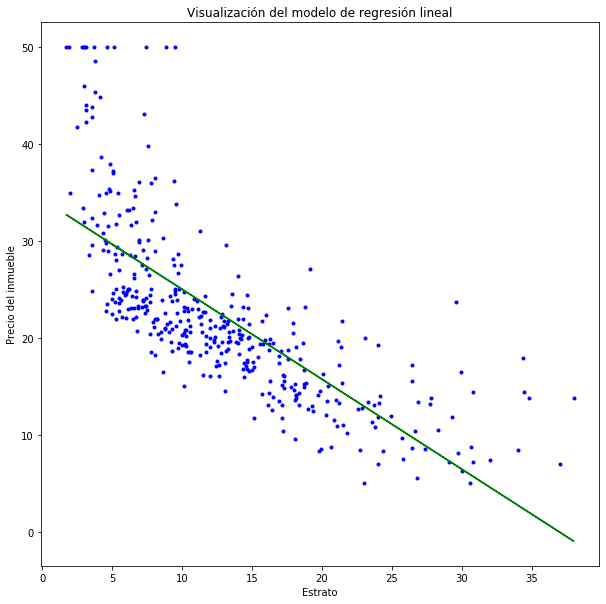

In [16]:
plt.figure(figsize=(10,10))
plt.title('Visualización del modelo de regresión lineal')
plt.xlabel('Estrato')  
plt.ylabel('Precio del inmueble')  
# Coeficiente 1
w1 = modelo_regresion.coef_[0]
# Intercepto
w0 = modelo_regresion.intercept_
plt.plot(X, Y,'.', color='blue')
plt.plot(X, w0 + w1*X, color ='green')
plt.show()

### 6. Transformación polinomial de variables predictoras

Primero creamos un objeto de PolynomicalFeatures de sklearn con el cual podemos realizar la transformación de la variable explicativa "estrato". Para este ejemplo utilizaremos una transformación polinómica de grado 2.  

In [17]:
# Se indica el grado de la transformación. 
pf = PolynomialFeatures(degree = 2) 

Esta transformación crea una nueva variable que será igual a "estrato elevado al cuadrado" y la incluye en el conjunto de datos.

In [18]:
# Se aplica la transformación a los datos.
X_pol = pf.fit_transform(X)  

In [19]:
# Se muestran los datos transformados.
X_pol

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  9.08  , 82.4464],
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904]])

### 7. Construcción del modelo utilizando regresión polinomial

Primero es necesario separar los conjuntos de datos pero ahora utilizaremos los datos con la nueva variable (X_pol).

In [20]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.  Como estamos utilizando el mismo
# valor para random_state (=0) garantizamos que obtenemos la misma partición utilizada para el modelo anterior.
X_train, X_test, Y_train, Y_test = train_test_split(X_pol, Y, test_size=0.2, random_state=0)

Entrenamiento del modelo de regresión polinomial. Puedes ver que se utiliza el mismo algoritmo utilizado para regresión lineal.

In [21]:
# Creación del objeto de la clase LinearRegression y ajuste del modelo a los datos.
modelo_reg_polinomial = LinearRegression().fit(X_train, Y_train)

### 8. Evaluación del modelo de regresión polinomial
Ahora vamos a evaluar el modelo sobre el conjunto test utilizando las mismas métricas.


In [22]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_reg_polinomial.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=True))
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 30.87
RMSE: 5.56
MAE: 4.01
R²: 0.55


Visualización de valores del modelo

In [23]:
# Parámetros del modelo (coeficientes de regresión e intercepto)
print ('Coeficientes: ', modelo_reg_polinomial.coef_)
print ('Intercepto: ',modelo_reg_polinomial.intercept_)

Coeficientes:  [ 0.         -2.32913758  0.04255097]
Intercepto:  42.82829440792415


Ahora visualizemos el modelo de regresión polinomial utilizando Matplotlib

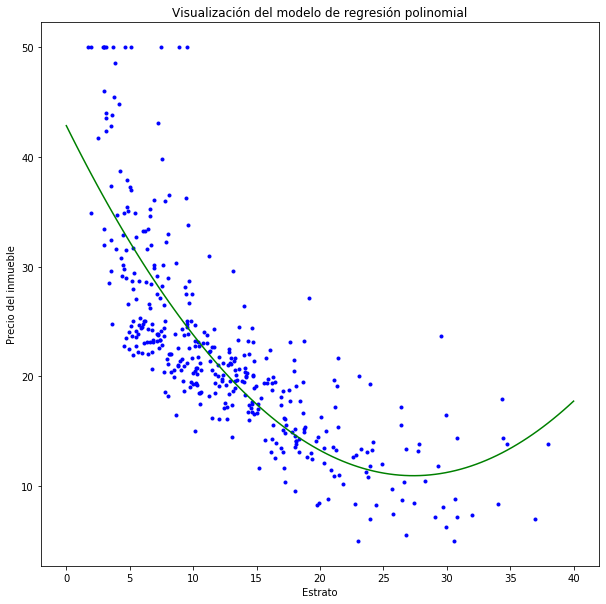

In [24]:
plt.figure(figsize=(10,10))
plt.title('Visualización del modelo de regresión polinomial')
plt.xlabel('Estrato')  
plt.ylabel('Precio del inmueble')  
# Coeficiente 1
w1 = modelo_reg_polinomial.coef_[1]
# Coeficiente 2
w2 = modelo_reg_polinomial.coef_[2]
# Intercepto
w0 = modelo_reg_polinomial.intercept_
plt.plot(X, Y,'.', color='blue')
puntos = np.linspace(0, 40, 100)
modelo = w0 + w1*puntos + w2*(puntos**2)
plt.plot(puntos, modelo , color ='green')
plt.show()

### 9. Regresión polinomial con otros grados de transformación

In [25]:
# Se indica el grado de la transformación. 
pf = PolynomialFeatures(degree = 3) 

In [26]:
# Se aplica la transformación a los datos.
X_pol = pf.fit_transform(X)  

In [27]:
# Se muestran los datos transformados.
X_pol

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827],
       ...,
       [  1.      ,   9.08    ,  82.4464  , 748.613312],
       [  1.      ,   5.64    ,  31.8096  , 179.406144],
       [  1.      ,   6.48    ,  41.9904  , 272.097792]])

In [28]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.  Como estamos utilizando el mismo
# valor para random_state (=0) garantizamos que obtenemos la misma partición utilizada para el modelo anterior.
X_train, X_test, Y_train, Y_test = train_test_split(X_pol, Y, test_size=0.2, random_state=0)

In [29]:
# Creación del objeto de la clase LinearRegression y ajuste del modelo a los datos.
modelo_reg_polinomial = LinearRegression().fit(X_train, Y_train)

In [30]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_reg_polinomial.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=True))
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 30.16
RMSE: 5.49
MAE: 3.94
R²: 0.56


In [31]:
# # Parámetros del modelo (coeficientes de regresión e intercepto)
print ('Coeficientes: ', modelo_reg_polinomial.coef_)
print ('Intercepto: ',modelo_reg_polinomial.intercept_)

Coeficientes:  [ 0.00000000e+00 -3.57414878e+00  1.27212572e-01 -1.58424280e-03]
Intercepto:  47.53396387655057


Ahora visualizemos el modelo de regresión polinomial utilizando Matplotlib

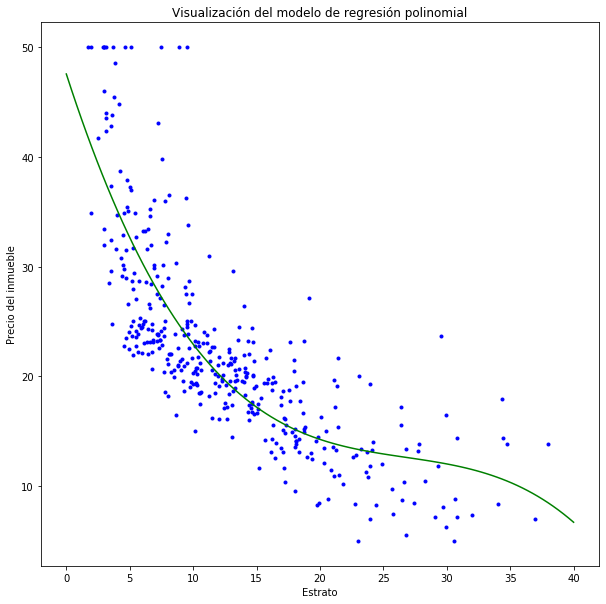

In [32]:
plt.figure(figsize=(10,10))
plt.title('Visualización del modelo de regresión polinomial')
plt.xlabel('Estrato')  
plt.ylabel('Precio del inmueble')  
# Coeficiente 1
w1 = modelo_reg_polinomial.coef_[1]
# Coeficiente 2
w2 = modelo_reg_polinomial.coef_[2]
# Coeficiente 3
w3 = modelo_reg_polinomial.coef_[3]
# Intercepto
w0 = modelo_reg_polinomial.intercept_
plt.plot(X, Y,'.', color='blue')
puntos = np.linspace(0, 40, 100)
modelo = w0 + w1*puntos + w2*puntos**2 + w3*puntos**3
plt.plot(puntos, modelo , color ='green')
plt.show()

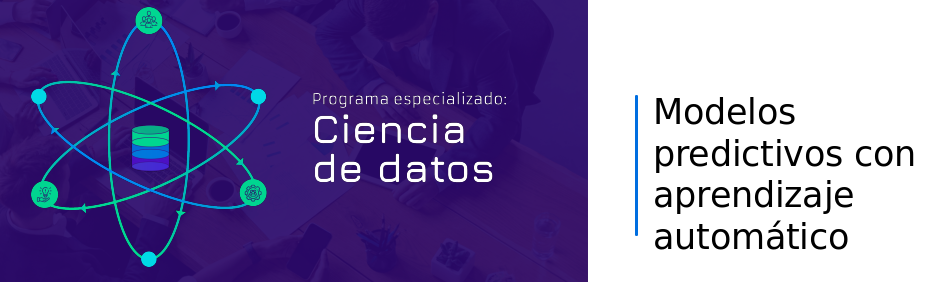